<img src="img/02.png">

# 01. Scikit-learn - basics

## 01.01 What is scikit-learn?

#### According to scikit-learn website: https://scikit-learn.org

Machine Learning in Python
* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

#### According to [REF1](../README.md) :

There are several Python libraries that provide solid implementations of a range of machine learning algorithms. One of the **best known** is Scikit-Learn, a package that provides efficient versions of a **large number of common algorithms**. Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and **complete online documentation**.


**IMPORTANT** this notebook is a **VERY** small piece of the scikit-learn library 

<img src="img/03.png">

## 01.02 Quickstart - Let's build your first model!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# apply seaborn style as a default
sns.set()

In [2]:
# DATA
np.random.seed(2)
a = 7
b = 13
x = np.linspace(0, 40, 200)
y_pure = a*x+b
y_noise = y_pure + np.random.uniform(-20, 20, size=y_pure.shape)

Text(0.5, 1.0, 'Data for linear regression')

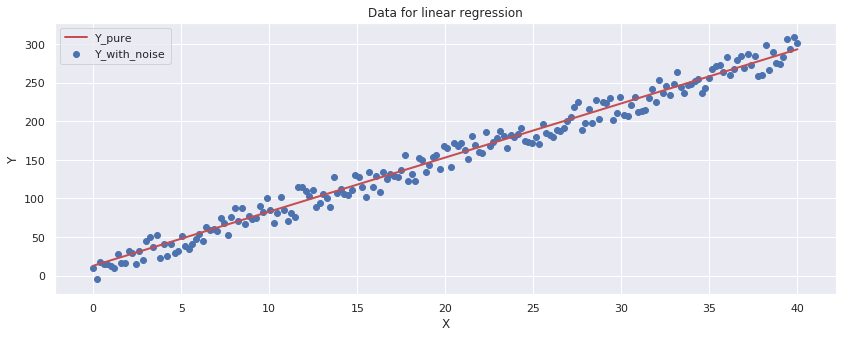

In [3]:
# PLOT
fig, ax = plt.subplots(1,1,figsize=(14,5))
plt.plot(x, y_pure, c='r', label="Y_pure", linewidth=2)
plt.scatter(x, y_noise, c = 'b', label="Y_with_noise")
plt.legend(loc='upper left')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data for linear regression")

In [4]:
# STEP 1
# choose model and import class 
from sklearn.linear_model import LinearRegression

In [5]:
# STEP 2
# initialize model object by passing hyperparameters
model = LinearRegression(fit_intercept=True)

In [6]:
# STEP 3
# prepare data in the correct shape
# to investigate the demanded shape call
# model.fit?

X_train = x.reshape(-1,1)
Y_train = y_noise.reshape(-1,1)

print(f"X_train.shape = {X_train.shape}")
print(f"Y_train.shape = {Y_train.shape}")

X_train.shape = (200, 1)
Y_train.shape = (200, 1)


In [7]:
# STEP 4 
# call `fit` method to calculate model weights
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# STEP 5
# you can use your trained model and make the predictions
# usind `predict` method
Y_pred = model.predict(X_train)

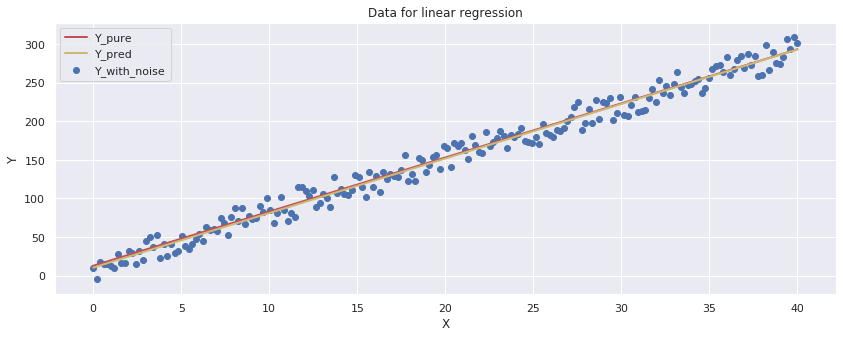

In [9]:
# PLOT the results
fig, ax = plt.subplots(1,1,figsize=(14,5))
plt.plot(x, y_pure, c='r', label="Y_pure", linewidth=2)
plt.scatter(x, y_noise, c = 'b', label="Y_with_noise")
plt.plot(x, Y_pred, c='y', label="Y_pred", linewidth=2)
plt.legend(loc='upper left')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data for linear regression");

In [10]:
print("Data generation coefficients for: Y = a*X+b:")
print(f"Original coefficients:     a={a:.3f}, b={b:.3f}")
print("Linear model coefficients: a={:.3f}, b={:.3f}".format(model.coef_[0,0], model.intercept_[0]))

Data generation coefficients for: Y = a*X+b:
Original coefficients:     a=7.000, b=13.000
Linear model coefficients: a=7.054, b=10.609


In [11]:
# now we can evaluate metrics

# NOTE: here we calculate MAE for `model predictions` vs `y_pure` 
# which will not happen in real life scenario
# splitting data into train and test set is much more common practice
# we will try this approach in a couple of seconds
mae = mean_absolute_error(y_true=y_pure, y_pred=Y_pred)
print(f"Mean Absolute Error = {mae:.4f}")

Mean Absolute Error = 1.3119


## 01.03 Predicting the price of a diamond!
Now let's try to guess the price of a diamond using dataset from `seaborn` tutorial. In this chapter we will investigate useful `scikit-learn` content for the limited content. In the next chaptel we will gather all things together and build a fancy estimator.

**IMPORTANT** 
Categorical data can be divided into: Nominal variable, Ordinal variable

**Nominal** data assigns names to each data point without placing it in some sort of order. For example: the color of eyes ('blue', 'red', 'black').

**Ordinal** data groups data according to some sort of ranking system: it orders the data. For example, test results could be grouped in descending order by grade: A, B, C, D, E and F.

It is easy to guess that the categorical data in our dataset are categorical but we will not tell our algorithm directly about this. We will assume all that all categorical data are nominal.

### 01.03.01 Read the data

In [12]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [13]:
df_diamonds = pd.read_csv("../92_data/diamonds.csv", index_col=0)
df_diamonds_price = df_diamonds['price']
df_diamonds.drop(columns='price', inplace=True)

In [14]:
df_diamonds_head = df_diamonds.head(100)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [15]:
# Data divided into numerical and categorical
cat_cols = [col_name for col_name in df_diamonds_head.columns if df_diamonds_head[col_name].dtype.kind == 'O']
num_cols = [col_name for col_name in df_diamonds_head.columns if df_diamonds_head[col_name].dtype.kind != 'O']

print('Categorical columns: {}'.format(cat_cols))
print('Numerical columns: {}'.format(num_cols))

Categorical columns: ['cut', 'color', 'clarity']
Numerical columns: ['carat', 'depth', 'table', 'x', 'y', 'z']


In [16]:
df_num = df_diamonds_head[num_cols]
df_cat = df_diamonds_head[cat_cols]
print("Numerical columns:")
display(df_num.head())
print("Categorical columns:")
display(df_cat.head())

Numerical columns:


,carat,depth,table,x,y,z
1,0.23,61.5,55.0,3.95,3.98,2.43
2,0.21,59.8,61.0,3.89,3.84,2.31
3,0.23,56.9,65.0,4.05,4.07,2.31
4,0.29,62.4,58.0,4.20,4.23,2.63
5,0.31,63.3,58.0,4.34,4.35,2.75


Categorical columns:


,cut,color,clarity
1,Ideal,E,SI2
2,Premium,E,SI1
3,Good,E,VS1
4,Premium,I,VS2
5,Good,J,SI2


### 01.03.02 Categorical data transformer - `OneHotEncoder`

In [17]:
ohe_trans = OneHotEncoder(sparse=False)
categoricals = ohe_trans.fit_transform(df_cat)
categoricals

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
# let's have a look what has happened
df_ohe = pd.DataFrame(categoricals, columns=np.hstack(ohe_trans.categories_))
df_ohe.head()

,Fair,Good,Ideal,Premium,Very Good,D,E,F,G,H,I,J,I1,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
all_categories = set(cut_order + color_order + clarity_order)
print("All categories:", all_categories)
ohe_categories = set(df_ohe.columns)
print("Categories not listed in OHE:", all_categories.difference(ohe_categories))

All categories: {'VS1', 'Good', 'E', 'Very Good', 'Fair', 'VVS2', 'Ideal', 'J', 'I1', 'I', 'F', 'SI1', 'VS2', 'Premium', 'IF', 'SI2', 'H', 'D', 'G', 'VVS1'}
Categories not listed in OHE: {'IF'}


In [20]:
# NOTE: 'IF' clarity has not happened in df_cat
df_diamonds_head['clarity'].value_counts()

SI1     30
SI2     19
VS1     17
VS2     13
VVS1    11
VVS2     9
I1       1
Name: clarity, dtype: int64

Sometimes it may happen that one of your categorical values may not be present in training set. On the one hand it is a very bad news for our training dataset and for sure it should be changed. On the other hand `scikit-learn` API provides some kind a solution for this situation.

In [21]:
ohe_trans = OneHotEncoder(sparse=False, categories=[cut_order, color_order, clarity_order])
categoricals = ohe_trans.fit_transform(df_cat)
categoricals

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
# Now we see 'IF' clarity as well!
df_ohe = pd.DataFrame(categoricals, columns=np.hstack(ohe_trans.categories_))
df_ohe.head()

,Fair,Good,Very Good,Premium,Ideal,J,I,H,G,F,E,D,I1,SI2,SI1,VS2,VS1,VVS2,VVS1,IF
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 01.03.03 Numerical data transformer - `StandardScaler`

In [23]:
# Standardize features by removing the mean and scaling to unit variance
ss_trans = StandardScaler()
numericals = ss_trans.fit_transform(df_num)
df_ss = pd.DataFrame(numericals, columns=df_num.columns)
df_ss.describe()

,carat,depth,table,x,y,z
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,7.105427e-17,-2.859241e-15,-4.878476e-17,1.509903e-16,1.323386e-15,-4.796163e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-7.940839e-01,-3.598231e+00,-1.577049e+00,-9.713030e-01,-1.092947e+00,-1.181879e+00
25%,-5.352139e-01,-5.091473e-01,-7.891155e-01,-5.960065e-01,-5.853440e-01,-6.549079e-01
50%,-2.116263e-01,1.252182e-01,-1.181900e-03,-1.939032e-01,-1.783470e-01,-1.718511e-01
75%,-8.219125e-02,6.492593e-01,3.927849e-01,2.948758e-02,4.115700e-02,1.355487e-01
max,4.124447e+00,2.579937e+00,4.332453e+00,3.782452e+00,3.626389e+00,4.087831e+00


### 01.03.03 Build a predictor

In [24]:
df_num_and_cat = pd.concat([df_ohe, df_ss], axis=1)
df_num_and_cat.head()

,Fair,Good,Very Good,Premium,Ideal,J,I,H,G,F,...,VS1,VVS2,VVS1,IF,carat,depth,table,x,y,z
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.599931,-0.067850,-1.183082,-0.685363,-0.672231,-0.713460
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.729366,-1.005607,1.180718,-0.792590,-0.928319,-1.064774
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-0.599931,-2.605311,2.756586,-0.506650,-0.507603,-1.064774
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.211626,0.428610,-0.001182,-0.238581,-0.214931,-0.127937
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.082191,0.925070,-0.001182,0.011616,0.004573,0.223377


In [25]:
# now let's build and train a model
model = LinearRegression()
model.fit(df_num_and_cat, df_diamonds_price.head(100))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = model.predict(df_num_and_cat)
mae = mean_absolute_error(y_true=df_diamonds_price.head(100), y_pred=y_pred)
print(f"Mean Absolute Error for a diamond price = {mae:.4f}")

Mean Absolute Error for a diamond price = 72.8293


## 01.04 Build an estimator!
In the previous chaptel we have succesfully build a price estimator. However, this approach gives a lot of intuition what is happening behind the scenes, it is not the most promising avenue if we consider to do something more complex (validation, grid search) wih our model.

In [27]:
# we construct tuples in the following way:
# (name, transformer, columns to apply)
num_trans = ('ss', StandardScaler(), num_cols)
cat_trans = ('ohe', OneHotEncoder(sparse=False), cat_cols)

# ColumnTransformer will apply proper transformations to the selected columns 
ct = ColumnTransformer(transformers=[num_trans, cat_trans])

# Pipeline will join all the transformers and a final predictor
model = Pipeline([('transformer', ct),
                  ('predictor', LinearRegression())])

`model` object is just what we need right now! Let's prepare our data to train a model like a pro

In [28]:
X = df_diamonds
Y = df_diamonds_price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
print(f"X_train.shape = {X_train.shape}")
print(f"Y_train.shape = {Y_train.shape}")
print(f"X_test.shape  = {X_test.shape}")
print(f"Y_test.shape  = {Y_test.shape}")

X_train.shape = (48546, 9)
Y_train.shape = (48546,)
X_test.shape  = (5394, 9)
Y_test.shape  = (5394,)


In [29]:
# train our model
model.fit(X_train, Y_train);

In [30]:
Y_pred = model.predict(X_test)
mae = mean_absolute_error(y_true=Y_test, y_pred=Y_pred)
print(f"Mean Absolute Error for a diamond price = {mae:.4f}")

Mean Absolute Error for a diamond price = 742.8038


One values rarely gives enought intuition. Let's make some plots!

In [31]:
df_pred = pd.concat([X_test,Y_test, pd.DataFrame({'price_pred': Y_pred}, index=X_test.index)], axis=1)
df_pred['error'] = np.abs(df_pred['price']-df_pred['price_pred'])
df_pred['rel_error'] = df_pred['error']/df_pred['price']
df_pred['price_tier'] = (df_pred['price']//400 + 0.5)*400
df_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,price_pred,error,rel_error,price_tier
53278,0.71,Good,G,VS2,58.9,61.0,5.81,5.84,3.43,2649,3199.015216,550.015216,0.207631,2600.0
21684,1.60,Premium,I,VS2,60.2,58.0,7.63,7.56,4.57,9784,10516.496163,732.496163,0.074867,9800.0
44761,0.52,Very Good,E,VS2,62.8,55.0,5.11,5.15,3.22,1621,2093.054416,472.054416,0.291212,1800.0
27452,2.04,Premium,H,VS1,60.7,61.0,8.18,8.10,4.94,18104,15575.940390,2528.059610,0.139641,18200.0
19267,1.39,Premium,G,SI1,61.3,59.0,7.24,7.15,4.41,7991,8847.422175,856.422175,0.107173,7800.0


(0, 1)

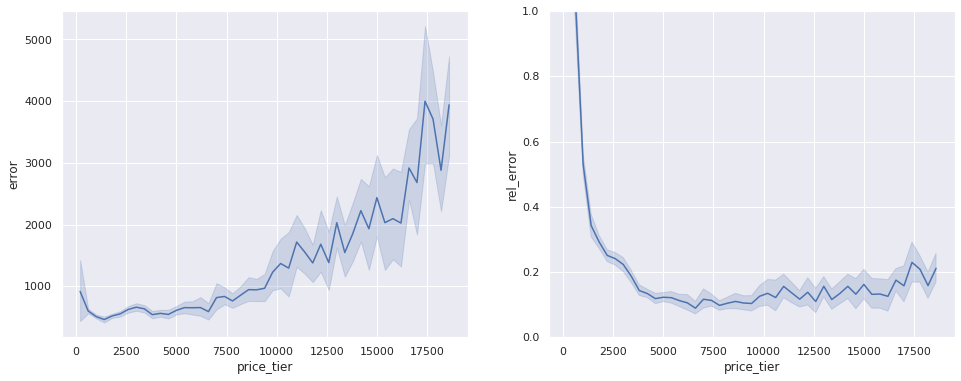

In [32]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax0 = ax.flat[0]
ax1 = ax.flat[1]

sns.lineplot(x='price_tier', y='error', data=df_pred, ax=ax0)
sns.lineplot(x='price_tier', y='rel_error', data=df_pred, ax=ax1)

ax1.set_ylim(0,1)

## 01.05 Try more complicated predictors

In [33]:
def build_model(predictor, kwargs):
    num_trans = ('ss', StandardScaler(), num_cols)
    cat_trans = ('ohe', OneHotEncoder(sparse=False), cat_cols)
    ct = ColumnTransformer(transformers=[num_trans, cat_trans])
    model = Pipeline([('transformer', ct),
                      ('predictor', predictor(**kwargs))])
    return model

In [34]:
def evaluate_model(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_true=Y_test, y_pred=Y_pred)
    print(f"Mean Absolute Error = {mae:.4f}")
    
    df_pred = pd.concat([X_test, Y_test, pd.DataFrame({'price_pred': Y_pred}, index=X_test.index)], axis=1)
    df_pred['error'] = np.abs(df_pred['price']-df_pred['price_pred'])
    df_pred['rel_error'] = df_pred['error']/df_pred['price']
    df_pred['price_tier'] = (df_pred['price']//400 + 0.5)*400
    
    fig, ax = plt.subplots(1,2, figsize=(16, 6))
    ax0 = ax.flat[0]
    ax1 = ax.flat[1]
    
    sns.lineplot(x='price_tier', y='error', data=df_pred, ax=ax0)
    sns.lineplot(x='price_tier', y='rel_error', data=df_pred, ax=ax1)

    ax1.set_ylim(0,1)
    plt.show()

Mean Absolute Error = 742.8038


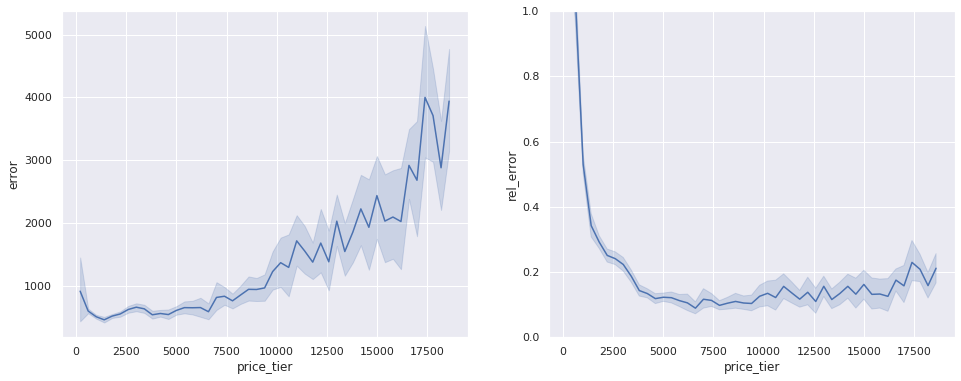

In [35]:
model = build_model(LinearRegression, {'fit_intercept':True})
model.fit(X_train, Y_train)
evaluate_model(model, X_test, Y_test)

Our code looks pretty! It is clean and short! Unfortunately our results are not satysfying... Let's try more complicated estimator.

Mean Absolute Error = 284.2002


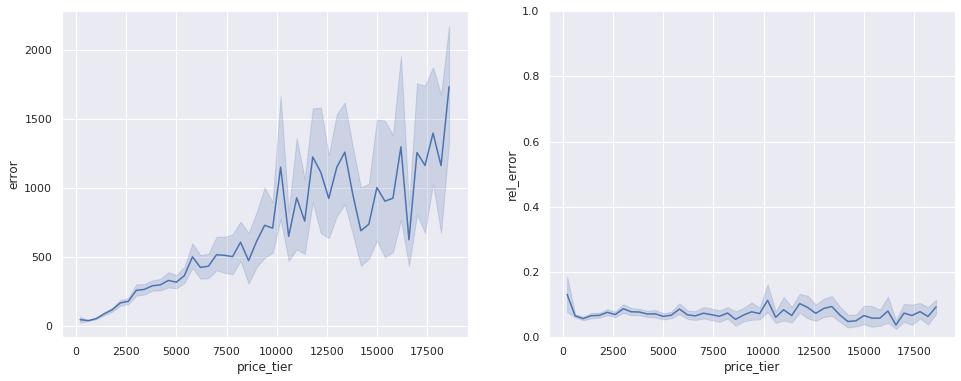

In [36]:
model = build_model(RandomForestRegressor, 
                    {'n_estimators':10})
model.fit(X_train, Y_train)
evaluate_model(model, X_test, Y_test)

This results looks much more promising! The last thing we need to do is tune `RandomForestRegressor` hyperparameters. We will use `GridSearchCV`

## 01.06 Hyperparameter tuning using `GridSearchCV`

`GridSearchCV` scoring parameters 
https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

**IMPORTANT** `n_jobs` parameter significantly increases computation efficiency

In [37]:
def gs_hpar_tuning(estimator, param_grid , X_train, Y_train):
    start = datetime.now()
    kf = KFold(n_splits=5, shuffle=True, random_state=11)
    grid = GridSearchCV(estimator, param_grid=param_grid, cv = kf, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid.fit(X_train, Y_train)
    
    print('Model best hyperparameters = {}'.format(grid.best_params_))
    print('GridSearchCV time={}'.format(datetime.now()-start))
    return grid.best_estimator_

In [38]:
# This may take a couple of seconds
param_grid = {
                'predictor__max_depth' : [None, 10, 30, 50],
                'predictor__min_samples_split' : [5, 7, 10],
                'predictor__min_samples_leaf' : [1, 2, 5],
            }

estimator = build_model(RandomForestRegressor, {'n_estimators':10})
best_estimator = gs_hpar_tuning(estimator, param_grid , X_train, Y_train)

Model best hyperparameters = {'predictor__max_depth': None, 'predictor__min_samples_leaf': 2, 'predictor__min_samples_split': 7}
GridSearchCV time=0:01:48.082381


Mean Absolute Error = 278.6250


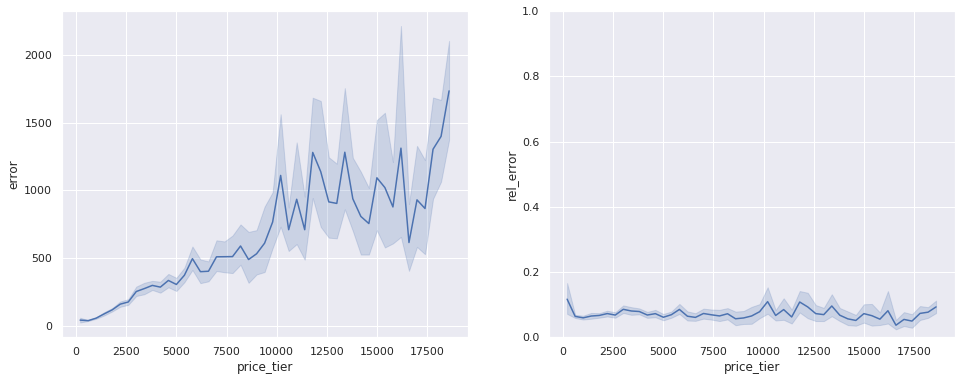

In [39]:
evaluate_model(best_estimator, X_test, Y_test)